# Multi Linear Regression

In [1]:
# we find the price to the help of certain features like area etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
su=pd.read_csv("C:\\Users\\hamza jamil\\Downloads\\Documents\\py-master\\ML\\2_linear_reg_multivariate\\homeprices.csv")
su

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
# first we fil the missing value
du=su.bedrooms.median()
du

4.0

In [4]:
su=su.fillna(du)
su

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
reg=linear_model.LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.fit(su.drop('price',axis='columns'),su.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

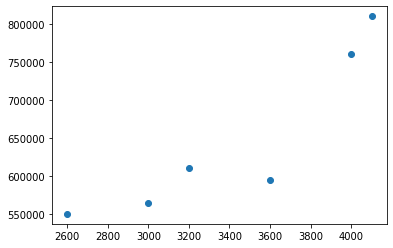

In [10]:
plt.scatter(su[['area']],su[['price']])

In [11]:
reg.predict([[4100,6.0,8]])

array([795258.55102673])

In [12]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [13]:
reg.intercept_

221323.00186540443

In [14]:
#y=m1*x1+m2*x2+m3*x3 this is formula of multilinear regression
112.06244194*4100+23388.88007794*6.0+-3231.71790863*8+221323.00186540408

795258.5510180041

# Multi Linear Regression

In [27]:
#here we predict salary to the help of no of features like expereince etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
sk=pd.read_csv("C:\\Users\\hamza jamil\\Downloads\\Documents\\py-master\\ML\\2_linear_reg_multivariate\\Exercise\\hiring.csv")
sk

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [16]:
#first we need to clean over data [experience]
sk.experience=sk.experience.fillna('zero')
sk.experience

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [17]:
#now we convert over character column into a number
sk.experience=sk.experience.apply(w2n.word_to_num)
sk.experience

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [18]:
# we fill missing value to the help of mean
import math
rep=math.floor(sk['test_score(out of 10)'].mean())
rep

7

In [19]:
sk['test_score(out of 10)']=sk['test_score(out of 10)'].fillna(rep)
sk

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [20]:
#we create over model 
mode=linear_model.LinearRegression()
mode

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#here we train over model 
mode.fit(sk[['experience','test_score(out of 10)','interview_score(out of 10)']],sk['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
mode.predict([[2,9,6]])

array([53713.86677124])

In [23]:
mode.predict([[12,10,10]])

array([93747.79628651])

In [24]:
mode.score(sk[['experience','test_score(out of 10)','interview_score(out of 10)']],sk['salary($)'])

0.977013901427314